In [2]:
import astropy.io.fits as fits
import pylab as plt
%matplotlib inline
import numpy as np
import glob
from astropy.time import Time
import pandas as pd
import lcoDD

SyntaxError: invalid syntax (download_data.py, line 17)

In [205]:
class image(object):
    def __init__(self,fi,filename=''):
        self.time=Time(fi[1].header['DATE-OBS'],format='isot')
        self.filt=fi[1].header['FILTERI1']
        self.ra=fi[1].header['RA']
        self.dec=fi[1].header['DEC']
        self.defoc=fi[1].header['FOCFLOFF']
        self.exptime=fi[1].header['EXPTIME']
        self.site=fi[1].header['SITEID']
        self.img=fi[1].data
        self.name="PDS110_JD"+str(np.round(self.time.jd-2450000,4))+"_"+str(self.filt)
        self.filename=filename
    def plot(self,n=0):
        #Plotting with imshow. 
        plt.figure(6,figsize=(10,15))
        plt.imshow(np.rot90(np.log10(self.img)))
    def plot_cut(self,n=0):
        #Plotting with lowest 50% and highest 0.2% values cut
        plt.figure(6,figsize=(10,15))
        plt.imshow(np.rot90(np.log10(np.clip(self.img,np.percentile(self.img,50),np.percentile(self.img,99.8))),k=3))
    def getdic(self):
        #Collecting self values from image into dictionary
        dic={key:value for key, value in self.__dict__.items() if not key.startswith('__') and not callable(key)}
        return dic
        
class photometry(object):
    def __init__(self):
        self.dic=pd.DataFrame([])
        self.imgs=[]
    def add_img(self,img):
        ser=pd.Series(img.getdic(),name=img.name)
        self.dic=self.dic.append(ser)
    def stack_same_imgs():
        return None

def get_imgs():
    key='2355e29a368f40c31b07e1e7692f002ddd8902c3'

In [200]:
rw=fits.open(f)

In [201]:
rw[1].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1523 / width of table in bytes                        
NAXIS2  =                 1020 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
DATADICV= 'LCOGT-DIC.FITS-0.11.0' / Version number of the data dictionary       
HDRVER  = 'LCOGT-HDR-1.4.0'    / Version number of the headers                  
ORIGIN  = 'LCOGT   '           / Organization responsible for the data          
SITEID  = 'coj     '           / ID code of the Observatory site                
SITE    = 'LCOGT node at Sid

In [154]:
fls=glob.glob('/Users/hosborn/Downloads/lcogtdata-20170817-36_2/*-e91.fits.fz')
phot=photometry()
for f in fls:
    phot.add_img(image(fits.open(f),f))

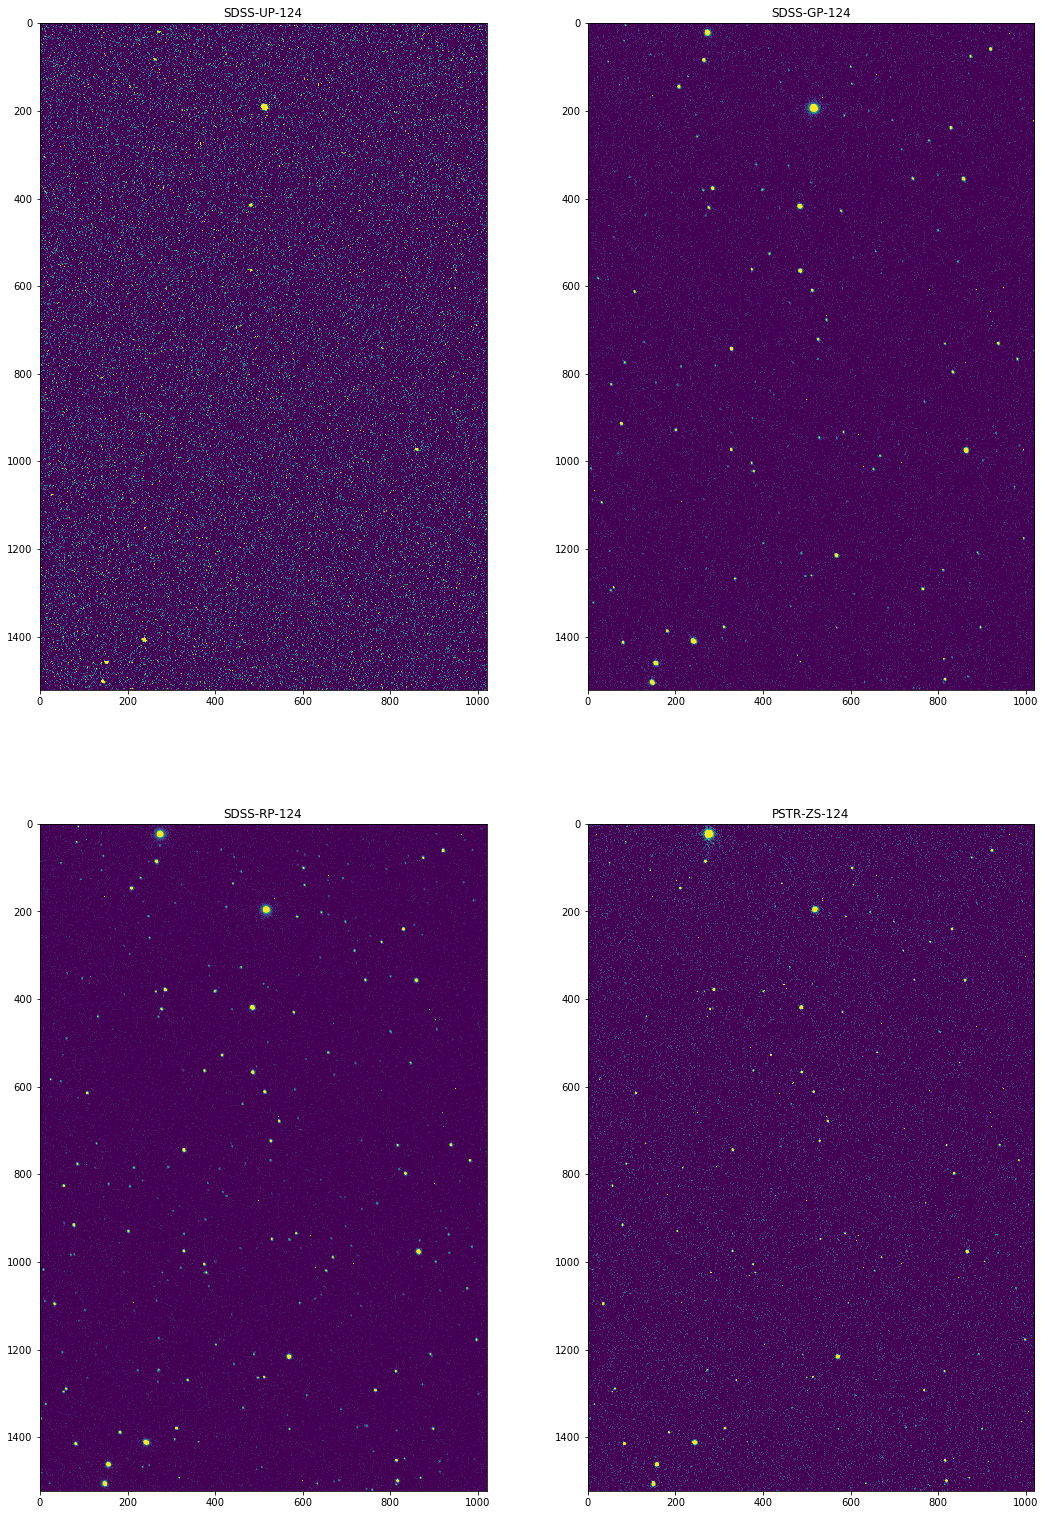

In [203]:
plt.figure(10,figsize=(18,27))
for n,ufilt in enumerate(pd.unique(phot.dic.filt)):
    frames=phot.dic.img[phot.dic.filt==ufilt]
    framestack=np.sum(np.dstack((frames)),axis=2)
    plt.subplot(2,2,n+1)
    plt.imshow(np.rot90(np.log10(np.clip(framestack,np.percentile(framestack,80),np.percentile(framestack,99.9))),k=3))
    plt.title(ufilt)
plt.tight_layout()
plt.savefig('LCO_first_data_COJ.png')

In [206]:
fls=glob.glob('/Users/hosborn/Downloads/lcogtdata-20170817-36/*-e91.fits.fz')
phot_2=photometry()
for f in fls:
    phot_2.add_img(image(fits.open(f),f))

In [207]:
phot_2.dic

dec  defoc  exptime  \
PDS110_JD7982.1287_SDSS-UP-124   -01:10:23.83    0.0   29.937   
PDS110_JD7982.1291_SDSS-UP-124   -01:10:23.54    0.0   29.942   
PDS110_JD7982.1296_SDSS-UP-124   -01:10:23.62    0.0   29.938   
PDS110_JD7982.1302_SDSS-GP-124  -01:10:22.311    0.0    9.946   
PDS110_JD7982.1304_SDSS-GP-124  -01:10:22.184    0.0    9.947   
PDS110_JD7982.1306_SDSS-GP-124  -01:10:22.324    0.0    9.931   
PDS110_JD7982.131_SDSS-RP-124   -01:10:22.296    0.0   11.938   
PDS110_JD7982.1312_SDSS-RP-124  -01:10:22.315    0.0   11.938   
PDS110_JD7982.1315_SDSS-RP-124  -01:10:22.114    0.0   11.941   
PDS110_JD7982.1319_PSTR-ZS-124  -01:10:21.084    0.0   13.937   
PDS110_JD7982.1321_PSTR-ZS-124  -01:10:20.934    0.0   13.943   
PDS110_JD7982.1324_PSTR-ZS-124  -01:10:20.747    0.0   13.934   

                                                                         filename  \
PDS110_JD7982.1287_SDSS-UP-124  /Users/hosborn/Downloads/lcogtdata-20170817-36...   
PDS110_JD7982.1291_SDSS-UP-124  /Users/hosborn/Downloads/lcogtdata-20170817-36...   
PDS110_JD7982.1296_SDSS-UP-124  /Users/hosborn/Downloads/lcogtdata-20170817-36...   
PDS110_JD7982.1302_SDSS-GP-124  /Users/hosborn/Downloads/lcogtdata-20170817-36...   
PDS110_JD7982.1304_SDSS-GP-124  /Users/hosborn/Downloads/lcogtdata-20170817-36...   
PDS110_JD7982.1306_SDSS-GP-124  /Users/hosborn/Downloads/lcogtdata-20170817-36...   
PDS110_JD7982.131_SDSS-RP-124   /Users/hosborn/Downloads/lcogtdata-20170817-36...   
PDS110_JD7982.1312_SDSS-RP-124  /Users/hosborn/Downloads/lcogtdata-20170817-36...   
PDS110_JD7982.1315_SDSS-RP-124  /Users/hosborn/Downloads/lcogtdata-20170817-36...   
PDS110_JD7982.1319_PSTR-ZS-124  /Users/hosborn/Downloads/lcogtdata-20170817-36...   
PDS110_JD7982.1321_PSTR-ZS-124  /Users/hosborn/Downloads/lcogtdata-20170817-36...   
PDS110_JD7982.1324_PSTR-ZS-124  /Users/hosborn/Downloads/lcogtdata-20170817-36...   

                                       filt  \
PDS110_JD7982.1287_SDSS-UP-124  SDSS-UP-124   
PDS110_JD7982.1291_SDSS-UP-124  SDSS-UP-124   
PDS110_JD7982.1296_SDSS-UP-124  SDSS-UP-124   
PDS110_JD7982.1302_SDSS-GP-124  SDSS-GP-124   
PDS110_JD7982.1304_SDSS-GP-124  SDSS-GP-124   
PDS110_JD7982.1306_SDSS-GP-124  SDSS-GP-124   
PDS110_JD7982.131_SDSS-RP-124   SDSS-RP-124   
PDS110_JD7982.1312_SDSS-RP-124  SDSS-RP-124   
PDS110_JD7982.1315_SDSS-RP-124  SDSS-RP-124   
PDS110_JD7982.1319_PSTR-ZS-124  PSTR-ZS-124   
PDS110_JD7982.1321_PSTR-ZS-124  PSTR-ZS-124   
PDS110_JD7982.1324_PSTR-ZS-124  PSTR-ZS-124   

                                                                              img  \
PDS110_JD7982.1287_SDSS-UP-124  [[23.1651, 25.2573, 11.8732, 47.1095, 45.02, 2...   
PDS110_JD7982.1291_SDSS-UP-124  [[20.283, -5.18317, 42.3884, -6.86986, 30.7028...   
PDS110_JD7982.1296_SDSS-UP-124  [[28.6855, 17.0341, 47.7796, 21.4389, 30.8, 33...   
PDS110_JD7982.1302_SDSS-GP-124  [[89.3711, 98.7989, 107.063, 83.1988, 122.892,...   
PDS110_JD7982.1304_SDSS-GP-124  [[67.1902, 90.7928, 112.727, 117.06, 89.2304, ...   
PDS110_JD7982.1306_SDSS-GP-124  [[97.4444, 74.3441, 120.969, 122.698, 97.5867,...   
PDS110_JD7982.131_SDSS-RP-124   [[117.184, 198.184, 145.821, 214.45, 167.333, ...   
PDS110_JD7982.1312_SDSS-RP-124  [[194.84, 179.15, 241.379, 186.345, 181.368, 1...   
PDS110_JD7982.1315_SDSS-RP-124  [[211.526, 189.997, 219.729, 172.239, 175.475,...   
PDS110_JD7982.1319_PSTR-ZS-124  [[91.1211, 95.6456, 95.9088, 86.2585, 75.7943,...   
PDS110_JD7982.1321_PSTR-ZS-124  [[102.4, 84.351, 132.278, 89.2177, 55.989, 125...   
PDS110_JD7982.1324_PSTR-ZS-124  [[59.9468, 67.6262, 81.9647, 97.5334, 84.389, ...   

                                                          name             ra  \
PDS110_JD7982.1287_SDSS-UP-124  PDS110_JD7982.1287_SDSS-UP-124   05:23:31.016   
PDS110_JD7982.1291_SDSS-UP-124  PDS110_JD7982.1291_SDSS-UP-124   05:23:31.012   
PDS110_JD7982.1296_SDSS-UP-124  PDS110_JD7982.1296_SDSS-UP-124   05:23:31.008   
PDS110_JD7982.1302_SDSS-GP-124  PDS110_JD7982.13

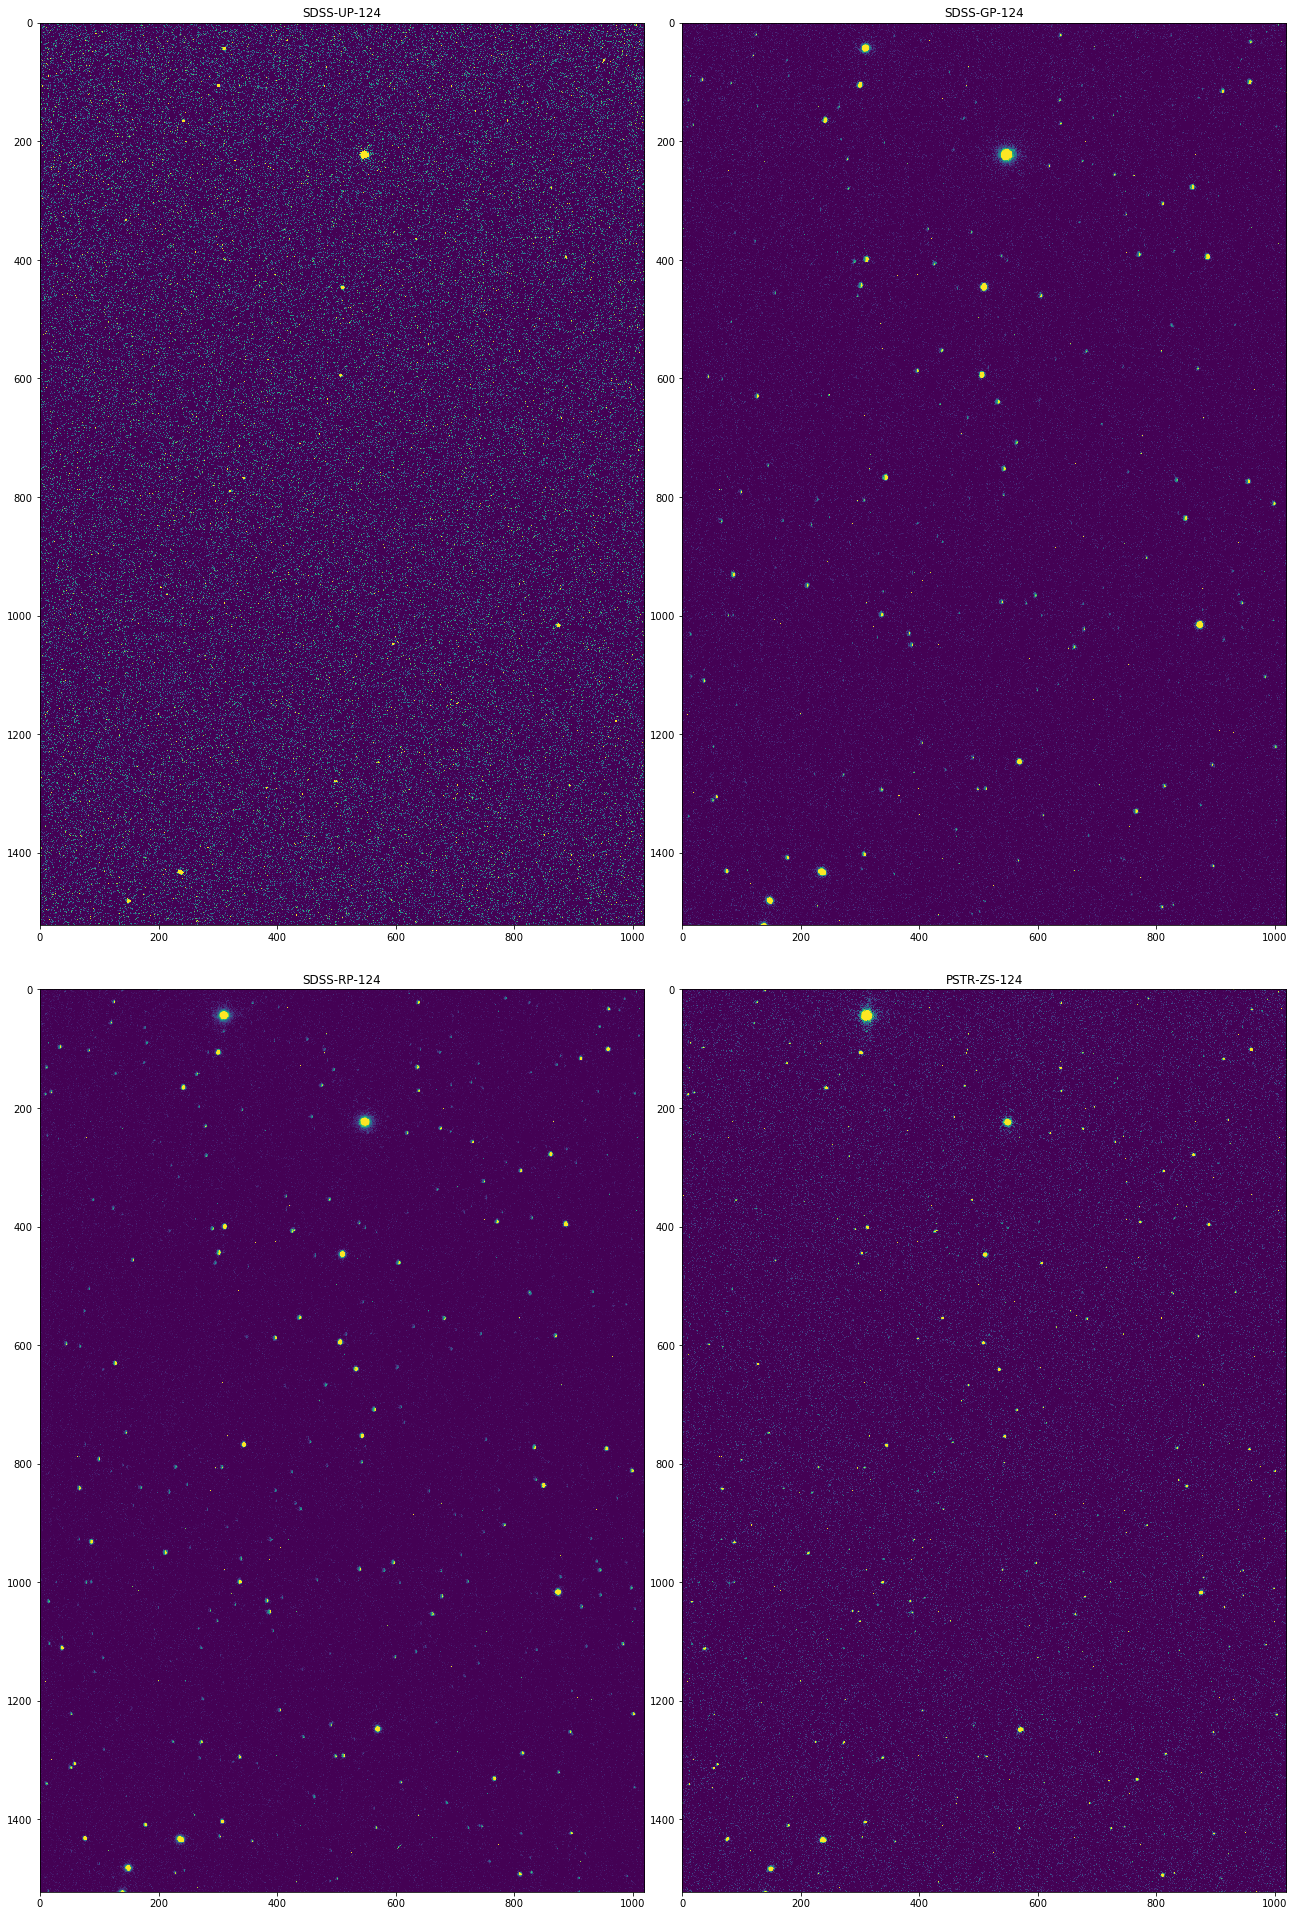

In [211]:
plt.figure(11,figsize=(18,27))
for n,ufilt in enumerate(pd.unique(phot_2.dic.filt)):
    frames=phot_2.dic.img[phot_2.dic.filt==ufilt]
    framestack=np.sum(np.dstack((frames)),axis=2)
    plt.subplot(2,2,n+1)
    plt.imshow(np.rot90(np.log10(np.clip(framestack,np.percentile(framestack,80),np.percentile(framestack,99.9))),k=3))
    plt.title(ufilt)
plt.tight_layout()
plt.savefig('LCO_first_data_OGG.png')

(array([  4.00000000e+00,   4.66033000e+06,   3.10000000e+01,
          6.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          6.00000000e+00]),
 array([ -26063.46289062,   -9777.06035156,    6509.3421875 ,
          22795.74472656,   39082.14726562,   55368.54980469,
          71654.95234375,   87941.35488281,  104227.75742187,
         120514.15996094,  136800.5625    ]),
 <a list of 10 Patch objects>)

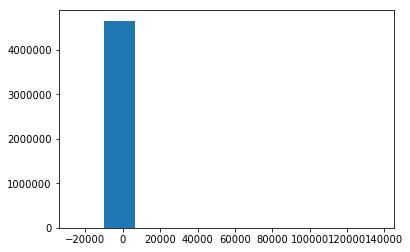

In [195]:
plt.hist(np.reshape(np.dstack((us)),(-1)))

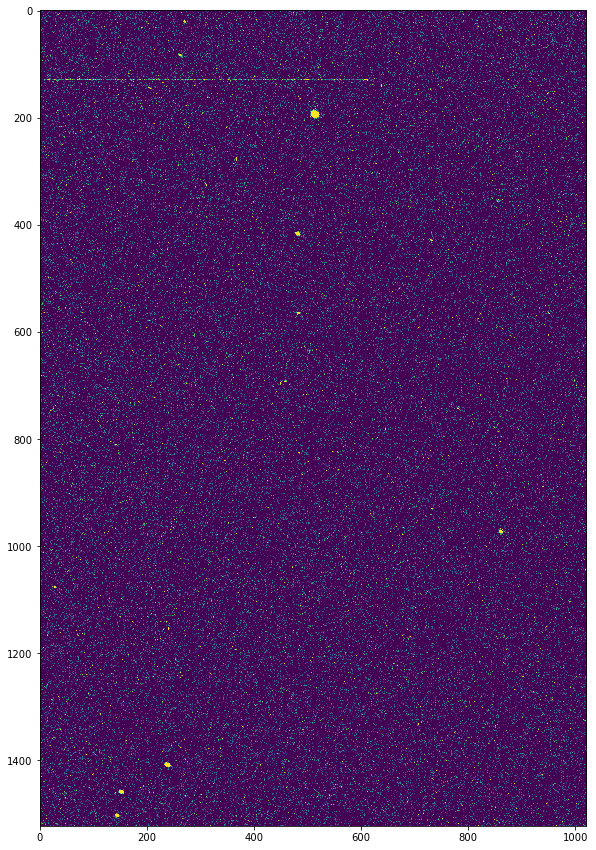

In [186]:
gs=phot.dic.img[phot.dic.filt=='SDSS-GP-124']
gsstack=np.sum(np.dstack((us)),axis=2)
plt.figure(2,figsize=(10,15))
plt.imshow(np.rot90(np.sqrt(np.clip(gsstack,np.percentile(gsstack,80),np.percentile(gsstack,99.9))),k=3))

In [187]:
#np.shape(us[0])
np.shape(np.dstack(us))

(1020, 1523, 3)

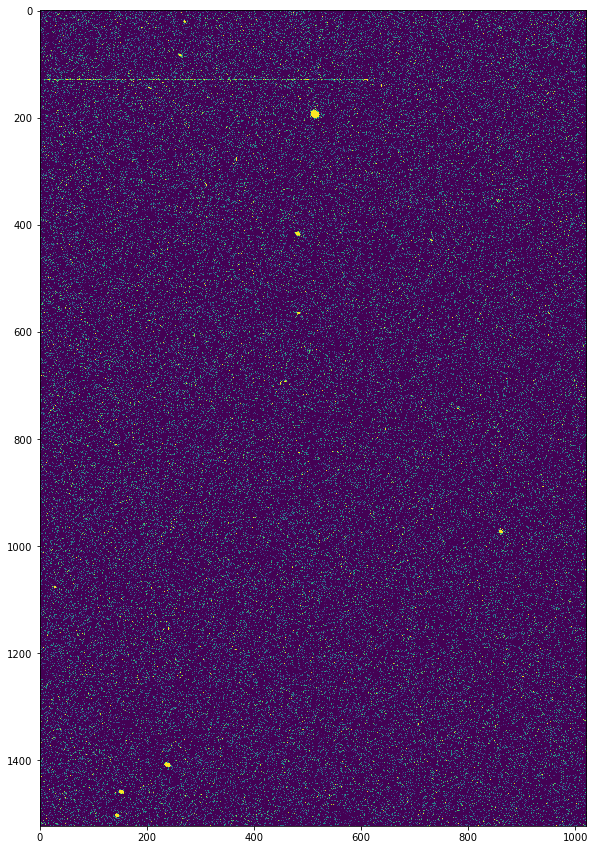

In [188]:
rs=phot.dic.img[phot.dic.filt=='SDSS-RP-124']
rsstack=np.sum(np.dstack((us)),axis=2)
plt.figure(3,figsize=(10,15))
plt.imshow(np.rot90(np.log10(np.clip(rsstack,np.percentile(rsstack,80),np.percentile(rsstack,99.9))),k=3))

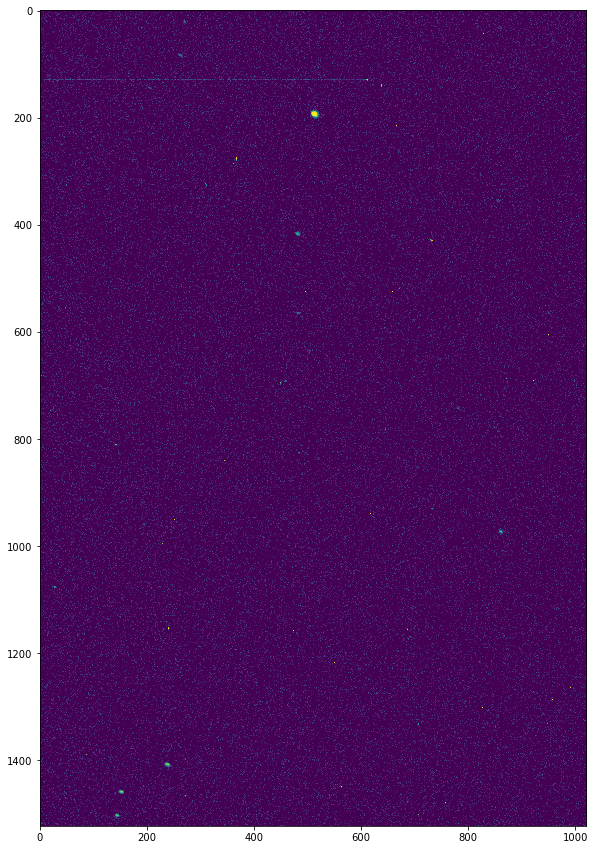

In [189]:
zs=phot.dic.img[phot.dic.filt=='PSTR-ZS-124']
zsstack=np.sum(np.dstack((us)),axis=2)
plt.figure(4,figsize=(10,15))
plt.imshow(np.rot90(np.log10(np.clip(zsstack,np.percentile(zsstack,80),np.percentile(zsstack,99.99))),k=3))

In [160]:
phot.dic.filt

PDS110_JD7982.3128_SDSS-UP-124    SDSS-UP-124
PDS110_JD7982.3132_SDSS-UP-124    SDSS-UP-124
PDS110_JD7982.3137_SDSS-UP-124    SDSS-UP-124
PDS110_JD7982.3144_SDSS-GP-124    SDSS-GP-124
PDS110_JD7982.3146_SDSS-GP-124    SDSS-GP-124
PDS110_JD7982.3148_SDSS-GP-124    SDSS-GP-124
PDS110_JD7982.3151_SDSS-RP-124    SDSS-RP-124
PDS110_JD7982.3154_SDSS-RP-124    SDSS-RP-124
PDS110_JD7982.3156_SDSS-RP-124    SDSS-RP-124
PDS110_JD7982.316_PSTR-ZS-124     PSTR-ZS-124
PDS110_JD7982.3163_PSTR-ZS-124    PSTR-ZS-124
PDS110_JD7982.3165_PSTR-ZS-124    PSTR-ZS-124
Name: filt, dtype: object

In [49]:
import 
rw[1].header['DATE-OBS']

SIMPLE  =                    T / A valid FITS file                              
BITPIX  =                   16 / [bits] Bits per pixel                          
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 1568 / [pixels]                                       
NAXIS2  =                 1056 / [pixels]                                       
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
DATADICV= 'LCOGT-DIC.FITS-0.11.0' / Version number of the data dictionary       
HDRVER  = 'LCOGT-HDR-1.4.0'    / Version number of the headers                  
ORIGIN  = 'LCOGT   '           / Organization responsible for the data          
SITEID  = 'coj     '           / ID code of the Observatory site                
SITE    = 'LCOGT node at Sid

/Users/hosborn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


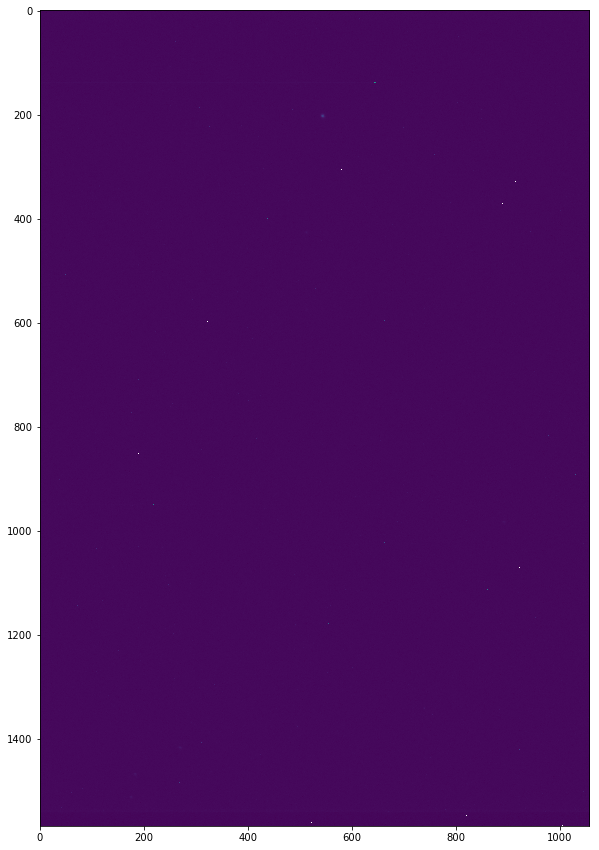

In [44]:
plt.figure(6,figsize=(10,15))
plt.imshow(np.rot90(np.sqrt(rw[1].data-0.95*np.median(rw[1].data)),k=3))

In [212]:
print(rw[1].header['CAT-RA'])
print(rw[1].header['CAT-DEC'])
print(rw[1].header['RLEVEL'])

05:23:31.012
-01:10:23.71
91


In [16]:
rw[1].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1523 / width of table in bytes                        
NAXIS2  =                 1020 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
DATADICV= 'LCOGT-DIC.FITS-0.11.0' / Version number of the data dictionary       
HDRVER  = 'LCOGT-HDR-1.4.0'    / Version number of the headers                  
ORIGIN  = 'LCOGT   '           / Organization responsible for the data          
SITEID  = 'coj     '           / ID code of the Observatory site                
SITE    = 'LCOGT node at Sid